# 1. Carga


### 1.1 Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Manejo de expresiones regulares

import re

# Librerias de Natural Language Toolkit

import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
english_stopwords = stopwords.words('english')
import es_core_news_sm
nlp = es_core_news_sm.load()
import textblob
from textblob import TextBlob, Word, Blobber

#machine learning
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import roc_auc_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JaimePuentesGomez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


### 1.2 Lectura del Archivo de Kindle Reviews

A través de la librería **pandas** de realiza la carga de datos del archivo "kindle_reviews.csv"

In [2]:
#Lecura del archivo de datos

base = pd.read_csv("kindle_reviews.csv", na_filter=False)

In [3]:
# Dimensiones de los datos
print("La Base de Datos de Kindle Review ", base.shape[0], "filas y ", base.shape[1], "columnas")

La Base de Datos de Kindle Review  982619 filas y  10 columnas


In [4]:
# Muestra del Archivo de datos
df = base.sample(n=20000, random_state=1).copy()
# se arregla el index
df = df.reset_index(drop=True)

In [5]:
# Visualización muestra de datos
display(df.sample(5))

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
18880,935655,B00KF0URBM,"[0, 0]",4,"Good, but like a lot of people have mentioned ...","05 19, 2014",A2KYQAKDQJSFIR,EnchantedHeart,Wait until it comes out in a box set...,1400457600
9916,376558,B00AMIX8P4,"[0, 0]",5,This was a an emotionally charged short story ...,"01 7, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",His Christmas Present,1357516800
11697,237365,B0087LX826,"[1, 1]",5,"A well written fantasy involving immortals, st...","02 16, 2013",A1RY16M7JVFLLZ,M. A. Whitcomb,The Silence of Lir,1360972800
8387,955069,B00KUEGX16,"[0, 0]",4,A romance with a porn star as the hero - charm...,"06 8, 2014",A2JXSFHVOBTEK3,AvidReader,4-Star - Cute and Smile-inducing Read....,1402185600
5714,785116,B00HRKUH5Y,"[2, 2]",5,"This book has it all! Cole, an alpha bear shi...","01 10, 2014",A3GFQDC7240EZR,Booklover Sue,A Great Paranormal romance,1389312000


# 2. Perfilamiento de Datos

In [6]:
ProfileReport(df)
# Es normal que se detecte alta cardinalidad,  ya que son comentarios y los autoes de los comentarios son diferentes.

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Perilamiento de datos, mostrando lineas de tiempo

In [7]:
base.dtypes

Unnamed: 0         int64
asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

Cambio de datos a Date Time de la columna reviewTime        

In [8]:
base['reviewTime']= pd.to_datetime(base['reviewTime'])

In [9]:
base.dtypes

Unnamed: 0                 int64
asin                      object
helpful                   object
overall                    int64
reviewText                object
reviewTime        datetime64[ns]
reviewerID                object
reviewerName              object
summary                   object
unixReviewTime             int64
dtype: object

Creación de una columna año

In [10]:
base['Year'] = base['reviewTime'].dt.year

In [11]:
base.head(5)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Year
0,0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,2014-05-05,A1F6404F1VG29J,Avidreader,Nice vintage story,1399248000,2014
1,1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,2014-01-06,AN0N05A9LIJEQ,critters,Different...,1388966400,2014
2,2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,2014-04-04,A795DMNCJILA6,dot,Oldie,1396569600,2014
3,3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,2014-02-19,A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1392768000,2014
4,4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...",2014-03-19,A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1395187200,2014


In [12]:
base.Year.value_counts()

2013    420370
2014    410695
2012    120248
2011     26522
2010      3976
2009       512
2008       191
2007        39
2006        23
2005        18
2004        10
2000         8
2003         4
2001         2
2002         1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Reviews por Año')

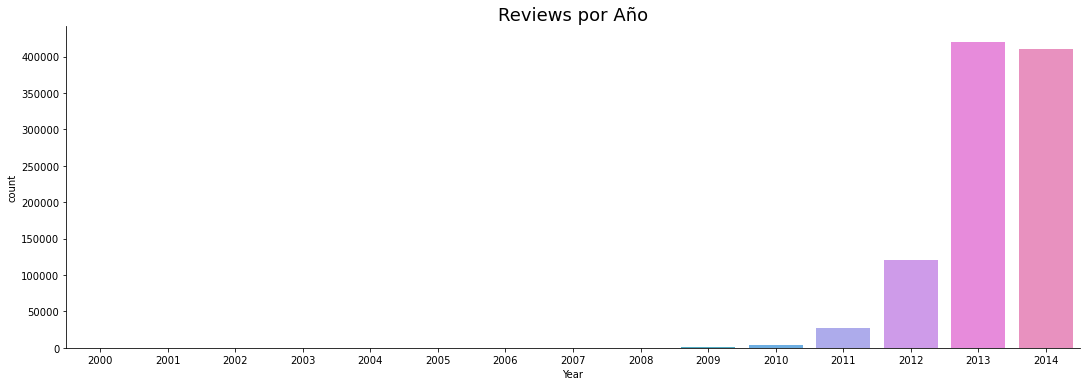

In [13]:
# Visualización de reviews por año
sns.catplot(data=base,x="Year", kind="count", height=5, aspect=3)
plt.title("Reviews por Año", size=18)

Text(0.5, 1.0, 'Clasificación de Calificaciones ( 1 - 5)')

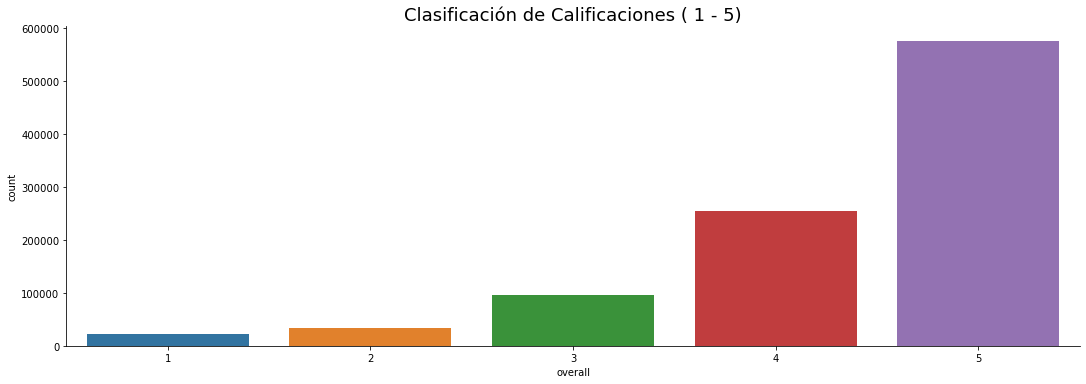

In [14]:
# Visualización de calificaciones
sns.catplot(data=base,x="overall", kind="count", height=5, aspect=3)
plt.title("Clasificación de Calificaciones ( 1 - 5)", size=18)

# 3. Limpieza de Datos

Se establece 3 como valor Neutro y se elimina del Dat Set

In [15]:
df = df[df['overall'] != 3] # se filtra para que solo tenga resultados diferentes a 3. Se interpreta 3 como una calificación neutra.

df['Rated'] = np.where(df['overall'] > 3, 1, 0)

<ipython-input-15-178098b4c6b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rated'] = np.where(df['overall'] > 3, 1, 0)


Verificación de NA

In [16]:
df.isna().sum()

Unnamed: 0        0
asin              0
helpful           0
overall           0
reviewText        0
reviewTime        0
reviewerID        0
reviewerName      0
summary           0
unixReviewTime    0
Rated             0
dtype: int64

# 4. Procesamiento de Texto

Funcion para Eliminar caracteres especiales

In [17]:
def cleaner(word):
    list_word_clean = []
    
#    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE) # remover URL, remueve numeros, 
                                                                                                                                                    #remueve caracteres como @, $, #, &
    word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)  # remover puntuacion
    word = re.sub(r'\#\.', '', word) #quitar numerales
    word = re.sub(r'\n', '', word) #remover espacios aparte
    word = re.sub(r',', '', word) # quitar comas
    word = re.sub(r'\-', ' ', word) # quitar slash
    word = re.sub(r'\.{3}', ' ', word) # quitar 3 puntos
    word = re.sub(r'a{2,}', 'a', word) # quitar 2 a's seguidas
    word = re.sub(r'é{2,}', 'é', word) # 
    word = re.sub(r'i{2,}', 'i', word)
    word = re.sub(r'ja{2,}', 'ja', word) 
    word = re.sub(r'á', 'a', word) # pasar todas las vocales con tilde a vocales sin tilde
    word = re.sub(r'é', 'e', word)
    word = re.sub(r'í', 'i', word)
    word = re.sub(r'ó', 'o', word)
    word = re.sub(r'ú', 'u', word)  
    word = re.sub('[^a-zA-Z]', ' ', word) # reemplazar todas las letras que contengan caracteres especiales
    word = re.sub(r'[^\w\s]', '', str(word).lower().strip()) # pasar a minusculas
    word  =  re.sub(' +', ' ', word) # me quita espacios adicionales
    word  = word.strip() # 
    word  =  re.sub('\r', '', word) # conservar todas las palabras
    
    

    for w1 in word.split(" "):
      if  w1.lower() not in english_stopwords:
        list_word_clean.append(w1.lower())
    
    out_text = " ".join(list_word_clean)
    
    return word,out_text, list_word_clean

Basado en la función Cleaner se crean 3 columnas: texto tratado, texto sin stopwords, texto tokens

In [18]:
aa = []
bb = []
cc = []
for i in df.iloc[:,4]:
    aa.append(cleaner(i)[0])
    bb.append(cleaner(i)[1])
    cc.append(cleaner(i)[2])

df['texto_tratado'] = aa
df['texto_sin_stopwords'] = bb
df['texto_tokens'] = cc


<ipython-input-18-d18ad0dfdc24>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['texto_tratado'] = aa
<ipython-input-18-d18ad0dfdc24>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['texto_sin_stopwords'] = bb
<ipython-input-18-d18ad0dfdc24>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [19]:
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ..."
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,..."
3,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw..."
4,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e..."
5,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan..."
19996,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b..."
19997,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,..."
19998,364929,B00AFF9AXS,"[0, 0]",4,For the price it was a great deal. My kid read...,"11 12, 2013",ARIDN94LOCQFD,Steve Taylor,Fun Book on Animals,1384214400,1,for the price it was a great deal my kid read ...,price great deal kid read lot outload intersti...,"[price, great, deal, kid, read, lot, outload, ..."


Analisis de Sentimiento, utilizando la libreria TextBlob y los conceptos de polaridad y subjetividad:

Polaridad hace referencia a cómo positivo o negativo el tono de las tasas de texto de entrada de -1 a + 1, por -1 son más negativo y + 1 está más positiva. 

Subjetividad hace referencia a cómo subjetiva las tasas de instrucción de 0 a 1, siendo 1 el alta subjetiva. 

In [20]:
sentim = []


for i in df.iloc[:,12]: # analisis de sentimiento para la columna 12 (texto tratado)
    sentim.append(TextBlob(i).sentiment)

In [21]:
polarity = []
subjectivity = []

for i in df.iloc[:,12]:
    polarity.append(TextBlob(i).sentiment[0])
    subjectivity.append(TextBlob(i).sentiment[1])

df['polarity'] = polarity
df['subjectivity'] = subjectivity


<ipython-input-21-f757a0e419cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = polarity
<ipython-input-21-f757a0e419cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subjectivity'] = subjectivity


In [22]:
df

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens,polarity,subjectivity
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ...",0.540000,0.820000
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,...",0.377727,0.581535
3,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw...",0.335714,0.304762
4,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e...",-0.125000,0.591667
5,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho...",0.291667,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan...",0.167003,0.587542
19996,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b...",0.347521,0.633150
19997,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,...",0.600000,0.600000
19998,364929,B00AFF9AXS,"[0, 0]",4,For the price it was a great deal. My kid read...,"11 12, 2013",ARIDN94LOCQFD,Steve Taylor,Fun Book on Animals,1384214400,1,for the price it was a great deal my kid read ...,price great deal kid read lot outload intersti...,"[price, great, deal, kid, read, lot, outload, ...",0.658333,0.770833


Retiro de Valores de Polaridad Neutros

In [23]:
# se retiran los valores neutros
df2 = df[(df['polarity'] > 0.1) | (df['polarity'] < -0.1)]
df2 = df2.reset_index(drop = True)


In [24]:
df2['Polaridad'] = np.where(df2['polarity'] >= 0.1, 1, 0)

In [25]:
df2

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Rated,texto_tratado,texto_sin_stopwords,texto_tokens,polarity,subjectivity,Polaridad
0,751188,B00H6TM1MI,"[5, 5]",5,I loved this novel! Elyse Salpeter has a mind ...,"01 17, 2014",A10QPT1QQKXEH5,Gwen P. Choate,AN ADVENTURE TO REMEMBER,1389916800,1,i loved this novel elyse salpeter has a mind f...,loved novel elyse salpeter mind filled magic a...,"[loved, novel, elyse, salpeter, mind, filled, ...",0.540000,0.820000,1
1,811076,B00I5LA4UW,"[1, 1]",5,I read the first book in &#8220;The Bristol Co...,"05 30, 2014",ALWA9UDP2BCP4,ScuttlebuttReviews,"a love story with quirks to make it different,...",1401408000,1,i read the first book in the bristol collectio...,read first book bristol collection junk last y...,"[read, first, book, bristol, collection, junk,...",0.377727,0.581535,1
2,831713,B00IH487I8,"[0, 0]",5,The third of the Fae Chronicles... You must re...,"05 3, 2014",A1WPGA0G4CA0RH,Ann D.,The Fae Chronicles Rock,1399075200,1,the third of the fae chronicles you must read ...,third fae chronicles must read first two under...,"[third, fae, chronicles, must, read, first, tw...",0.335714,0.304762,1
3,87446,B005BXU0BA,"[0, 0]",5,THIS BOOK LITERALLY PUT TEARS IN MY EYES. Jade...,"01 31, 2013",A20BUMEC3IC3SV,Kosha Jordan,OMG,1359590400,1,this book literally put tears in my eyes jade ...,book literally put tears eyes jade f ed upped ...,"[book, literally, put, tears, eyes, jade, f, e...",-0.125000,0.591667,0
4,173429,B0073VIZB0,"[0, 0]",4,I knew this was part of a series yet i have to...,"04 16, 2014",A1OVFZ8CHH285D,MVO,great opening,1397606400,1,i knew this was part of a series yet i have to...,knew part series yet say complete without clif...,"[knew, part, series, yet, say, complete, witho...",0.291667,0.533333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,682451,B00FUBT7S0,"[1, 1]",5,I was cheering on the side lines of this story...,"03 7, 2014",A1Q0ZPKJY5XUQ3,cara@2ndglance,"Short, To The Point",1394150400,1,i was cheering on the side lines of this story...,cheering side lines story pages begging story ...,"[cheering, side, lines, story, pages, begging,...",0.314461,0.548529,1
15378,841551,B00IMOHIQ0,"[1, 1]",5,Defiant Dragon carries on the way that I expec...,"03 3, 2014",A3KBXA47IC49FW,Kimmy T,This is why I'm a fan!,1393804800,1,defiant dragon carries on the way that i expec...,defiant dragon carries way expect kassanna boo...,"[defiant, dragon, carries, way, expect, kassan...",0.167003,0.587542,1
15379,385376,B00AQBDRFI,"[1, 2]",5,"Okay, I know this was a book was for a sexual ...","03 17, 2013",A2YOAV9HC8HNMB,"Amazon Customer ""&#34;Reader&#34;""",Crazy For Milk,1363478400,1,okay i know this was a book was for a sexual c...,okay know book sexual charge honestly book rea...,"[okay, know, book, sexual, charge, honestly, b...",0.347521,0.633150,1
15380,73614,B005201LGK,"[0, 0]",5,I have been reading these books and love them ...,"04 25, 2012",A1CEGMSGVVDH19,Maria Hall,teys wolf,1335312000,1,i have been reading these books and love them ...,reading books love like reread say lot books k...,"[reading, books, love, like, reread, say, lot,...",0.600000,0.600000,1


# 5. Regresion Logistica

In [27]:
# se trae los conjuntos de text y trian 
from  sklearn.model_selection import train_test_split

# Se selecciona la variable objetivo, en este caso "Polaridad".
Y=df2["Polaridad"]

# Del conjunto de datos se escoge los textos sin stopwords
X = df2["texto_sin_stopwords"]

# Datos de entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0)


In [28]:
# Transformación de docimentos del los datos de entrenamiento a una matriz
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

#Entrenamiento del Modelo

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Prediccion dle Modelo
predictions = model.predict(vect.transform(X_test))

#Score utilizando la curva ROC
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7046850874935666


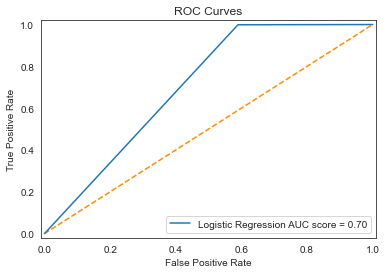

In [29]:
sns.set_style('white')
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], linestyle = '--', color = 'darkorange')

probs = [predictions]
labels = ['Logistic Regression']
for idx in range(len(probs)):
    fpr, tpr, thresholds = roc_curve(y_test, probs[idx])
    ax.plot(fpr, tpr, label = (labels[idx] + ' AUC score = %.2f' % roc_auc_score(y_test, probs[idx])))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
ax.legend(loc = 'lower right')
ax.margins(x = 0.01, y =0.02)
plt.show()

In [30]:
# matriz de confusion
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57       134
           1       0.98      1.00      0.99      3712

    accuracy                           0.98      3846
   macro avg       0.96      0.70      0.78      3846
weighted avg       0.98      0.98      0.97      3846

